## todo: switch this to seaborn

In [27]:
# auto reload when source code changes
%load_ext autoreload
%autoreload 2

# include  folder in path
import os, sys, math
import numpy as np

import matplotlib.pyplot as plt

sys.path.append('../sanode') # Adds higher directory to python modules path.

import aicsPlot

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


   SAN1 [21.256964273856198, 19.0087801314828]
   SAN2 [28.1569735128783, 20.692985659913102]
   SAN3 [15.486733644986801, 12.685823140878401]
   SAN4 [23.742719589632202, 14.5016489064581]
   SAN7 [20.6944223484848, 13.4186079545455]
   SAN8 [37.550607195032896, 27.6038540075702]
  plotMaskDensity superiorList: [21.256964273856198, 28.1569735128783, 15.486733644986801, 23.742719589632202, 20.6944223484848, 37.550607195032896]
  plotMaskDensity inferiorList: [19.0087801314828, 20.692985659913102, 12.685823140878401, 14.5016489064581, 13.4186079545455, 27.6038540075702]


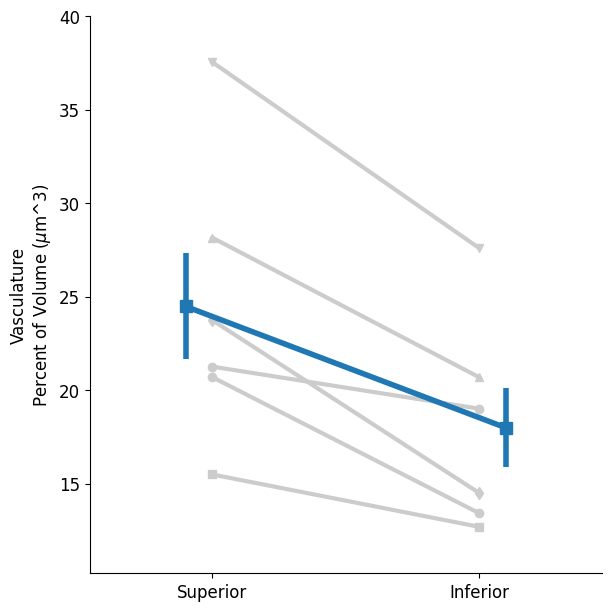

mean:24.48 sd:6.96 sem:2.84 n:6 min:15.49 max:37.55 median:22.50
mean:17.99 sd:5.20 sem:2.12 n:6 min:12.69 max:27.60 median:16.76
wilcoxon stat: 21.0 p: 0.015625


In [29]:
# Density-Result-ch{channel}.csv is created with 'python aicsMaskDen.py'
channel = 2
csvFile = f'../Density-Result-ch{channel}.csv'

aicsPlot.defaultPlotLayout(plotForTalk=False)
fig,ax = plt.subplots(1, figsize=(6,6)) # need constrained_layout=True to see axes titles

superiorList, inferiorList, ax = aicsPlot.plotMaskDensity(channel=channel, csvFile=csvFile,
                                                          plotMean=True, plotForTalk=False,
                                                         ax=ax)


In [30]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

# do stats
import scipy
alternative = 'greater' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('superiorList:', superiorList)
print('inferiorList:', inferiorList)
print('wilcoxon pValue:', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:', pValue)


superiorList: [21.256964273856198, 28.1569735128783, 15.486733644986801, 23.742719589632202, 20.6944223484848, 37.550607195032896]
inferiorList: [19.0087801314828, 20.692985659913102, 12.685823140878401, 14.5016489064581, 13.4186079545455, 27.6038540075702]
wilcoxon pValue: 0.015625
paired ttest pValue: 0.004466942919086725


SAN1 [2.61792230606079, 3.93526744842529]
SAN2 [2.7070512771606405, 4.31861019134522]
SAN3 [3.00351452827454, 8.01746940612793]
SAN4 [2.67742156982422, 4.97184705734253]
SAN7 [2.0774462223053, 3.89873814582825]
SAN8 [2.15239691734314, 2.98498892784119]


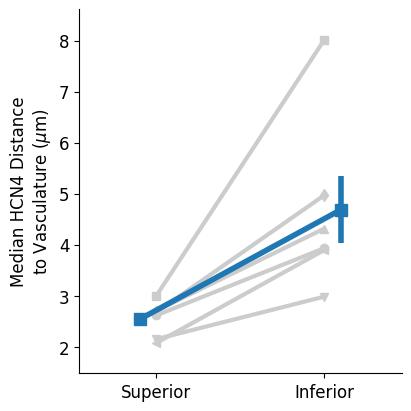

mean:2.54 sd:0.32 sem:0.13 n:6 min:2.08 max:3.00 median:2.65
mean:4.69 sd:1.60 sem:0.65 n:6 min:2.98 max:8.02 median:4.13
wilcoxon stat: 0.0 p: 0.03125
paired ttest stat: -3.540152035548309 pValue: 0.016559895851381276


In [61]:
# this requires a file
#os.path.isfile('saNode/hcn4-Distance-Result.csv')

aicsPlot.defaultPlotLayout(plotForTalk=False)

if 0:
    fig,ax = plt.subplots(1, figsize=(4,4)) # need constrained_layout=True to see axes titles
    statCol = 'mean'
    superiorList, inferiorList, ax = aicsPlot.plotMeanDist(csvFile='../hcn4-Distance-Result.csv',
                                                    statCol=statCol,
                                                    plotForTalk=False,
                                                    ax=ax)

if 1:
    statCol = 'median'
    fig,ax = plt.subplots(1, figsize=(4,4)) # need constrained_layout=True to see axes titles
    superiorList, inferiorList, ax = aicsPlot.plotMeanDist(csvFile='../hcn4-Distance-Result.csv',
                                                       statCol=statCol,
                                                      plotForTalk=False,
                                                      ax=ax)

In [62]:
# do stats on return from aicsPlot.plotMeanDist

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

print('statCol:', statCol)
print('superiorList:')
for x in superiorList:
    print(x)
print('inferiorList:')
for x in inferiorList:
    print(x)

# do stats
import scipy
alternative = 'two-sided' #(“two-sided”, “greater”, “less”) # The alternative hypothesis to be tested
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('wilcoxon stat:', stat, 'pValue:', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest stat:', stat, 'pValue:', pValue)


statCol: median
superiorList:
2.61792230606079
2.7070512771606405
3.00351452827454
2.67742156982422
2.0774462223053
2.15239691734314
inferiorList:
3.93526744842529
4.31861019134522
8.01746940612793
4.97184705734253
3.89873814582825
2.98498892784119
wilcoxon stat: 0.0 pValue: 0.03125
paired ttest stat: -3.540152035548309 pValue: 0.016559895851381276
